In [17]:
import matplotlib.pyplot as plt
import numpy as np
import uncertainties as unc
import uncertainties.unumpy as unp

unv=unp.nominal_values
usd=unp.std_devs

L_in=10 #dBm
P_in=10**(L_in/10) #mW

def P(U):
    Pref=1. #mW
    a=unc.ufloat(0.772,0.023) #volt
    B=unc.ufloat(0.310,0.019) #no unit
    P=Pref/(a*B)*U*(unp.exp(U/a)-1)
    return P

def daempfung(P_in,P_out):
    alpha=10*unp.log10(P_in/P_out) #dB
    return alpha

## Isolator

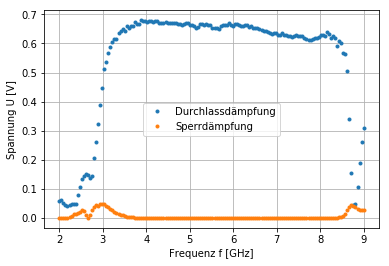

In [2]:
f1nach2, U1nach2 = np.loadtxt("messung/Isolator1-2.txt",unpack=True,skiprows=1) #f in GHz, U in in V
f2nach1, U2nach1 = np.loadtxt("messung/Isolator2-1.txt",unpack=True,skiprows=1) #f in GHz, U in in V
plt.plot(f1nach2,U1nach2,ls=" ", marker=".",label="Durchlassdämpfung")
plt.plot(f2nach1,U2nach1,ls=" ", marker=".",label="Sperrdämpfung")
plt.xlabel("Frequenz f [GHz]")
plt.ylabel("Spannung U [V]")
plt.legend()
plt.grid()
#plt.savefig("img/Isolator.pdf")
plt.show()

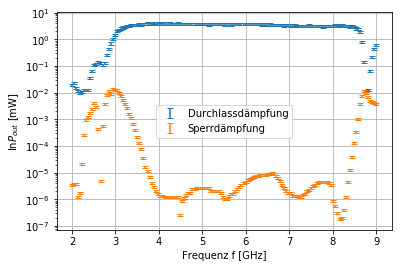

In [21]:
f1nach2, U1nach2 = np.loadtxt("messung/Isolator1-2.txt",unpack=True,skiprows=1) #f in GHz, U in in V
f2nach1, U2nach1 = np.loadtxt("messung/Isolator2-1.txt",unpack=True,skiprows=1) #f in GHz, U in in V
plt.errorbar(f1nach2,unv(P(U1nach2)),yerr=usd(P(U1nach2)),ls=" ",label="Durchlassdämpfung",capsize=3)
plt.errorbar(f2nach1,unv(P(U2nach1)),yerr=usd(P(U2nach1)),label="Sperrdämpfung",ls="",capsize=3)
plt.xlabel("Frequenz f [GHz]")
plt.ylabel("$\\ln{P_{out}}$ [mW]")
plt.yscale("log")
plt.legend()
plt.grid()
plt.savefig("img/Isolator_Leistung.pdf")
plt.show()

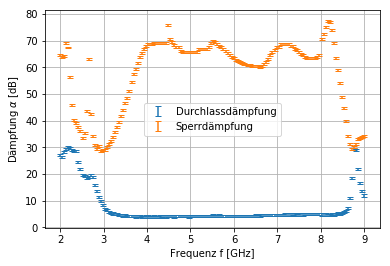

In [22]:
f1nach2, U1nach2 = np.loadtxt("messung/Isolator1-2.txt",unpack=True,skiprows=1) #f in GHz, U in in V
f2nach1, U2nach1 = np.loadtxt("messung/Isolator2-1.txt",unpack=True,skiprows=1) #f in GHz, U in in V

alphaD=daempfung(P_in,P(U1nach2))
alphaS=daempfung(P_in,P(U2nach1))
plt.errorbar(f1nach2,unv(alphaD),yerr=usd(alphaD),ls=" ",label="Durchlassdämpfung",capsize=3)
plt.errorbar(f2nach1,unv(alphaS),yerr=usd(alphaS),label="Sperrdämpfung",ls="",capsize=3)
plt.xlabel("Frequenz f [GHz]")
plt.ylabel("Dämpfung $\\alpha$ [dB]")
plt.legend()
plt.grid()
plt.savefig("img/Isolator_Daempfung.pdf")
plt.show()

## Richtkoppler

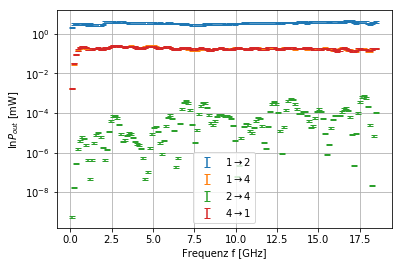

In [23]:
f1nach2, U1nach2 = np.loadtxt("messung/Richtkoppler1-2.txt",unpack=True,skiprows=1) #f in GHz, U in in V
f1nach4, U1nach4 = np.loadtxt("messung/Richtkoppler1-4.txt",unpack=True,skiprows=1) #f in GHz, U in in V
f2nach4, U2nach4 = np.loadtxt("messung/Richtkoppler2-4.txt",unpack=True,skiprows=1) #f in GHz, U in in V
f4nach1, U4nach1 = np.loadtxt("messung/Richtkoppler4-1.txt",unpack=True,skiprows=1) #f in GHz, U in in V

plt.errorbar(f1nach2,unv(P(U1nach2)),yerr=usd(P(U1nach2)),ls=" ",label="$1\\rightarrow2$",capsize=3)
plt.errorbar(f1nach4,unv(P(U1nach4)),yerr=usd(P(U1nach4)),ls=" ",label="$1\\rightarrow4$",capsize=3)
plt.errorbar(f2nach4,unv(P(U2nach4)),yerr=usd(P(U2nach4)),ls=" ",label="$2\\rightarrow4$",capsize=3)
plt.errorbar(f4nach1,unv(P(U4nach1)),yerr=usd(P(U4nach1)),ls=" ",label="$4\\rightarrow1$",capsize=3)


plt.xlabel("Frequenz f [GHz]")
plt.ylabel("$\\ln{P_{out}}$ [mW]")
plt.yscale("log")
plt.legend()
plt.grid()
plt.savefig("img/Richtkoppler_Leistung.pdf")
plt.show()

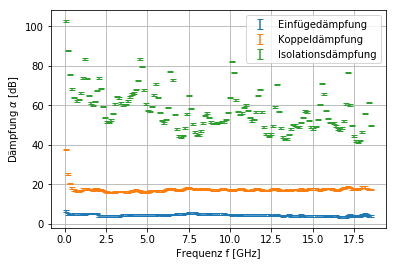

In [24]:
aKoppel=daempfung(P_in,P(U1nach4))
aEinfuege=daempfung(P_in,P(U1nach2))
aIsolation=daempfung(P_in,P(U2nach4))
#aRichtung=daempfung(P_in, P(U1nach2))

plt.errorbar(f1nach2,unv(aEinfuege),yerr=usd(aEinfuege),ls=" ",label="Einfügedämpfung",capsize=3)
plt.errorbar(f1nach4,unv(aKoppel),yerr=usd(aKoppel),label="Koppeldämpfung",ls="",capsize=3)
plt.errorbar(f1nach4,unv(aIsolation),yerr=usd(aIsolation),label="Isolationsdämpfung",ls="",capsize=3)
#plt.errorbar(f1nach4,unv(aIsolation),yerr=usd(aIsolation),label="Richtdämpfung",ls="",capsize=3)

plt.xlabel("Frequenz f [GHz]")
plt.ylabel("Dämpfung $\\alpha$ [dB]")
plt.legend()
plt.grid()
plt.savefig("img/Richtkoppler_Daempfung.pdf")
plt.show()

## Zirkulator

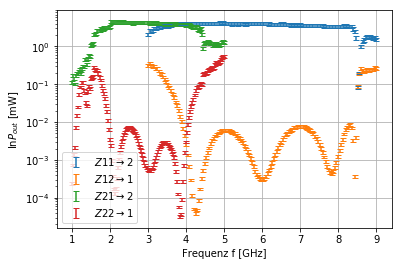

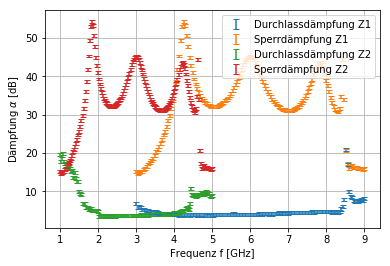

In [19]:
Z1f1nach2, Z1U1nach2 = np.loadtxt("messung/Zirkulator1_1-2.txt",unpack=True,skiprows=1) #f in GHz, U in in V
Z1f2nach1, Z1U2nach1 = np.loadtxt("messung/Zirkulator1_2-1.txt",unpack=True,skiprows=1) #f in GHz, U in in V
Z2f1nach2, Z2U1nach2 = np.loadtxt("messung/Zirkulator2_1-2.txt",unpack=True,skiprows=1) #f in GHz, U in in V
Z2f2nach1, Z2U2nach1 = np.loadtxt("messung/Zirkulator2_2-1.txt",unpack=True,skiprows=1) #f in GHz, U in in V

plt.errorbar(Z1f1nach2,unv(P(Z1U1nach2)),yerr=usd(P(Z1U1nach2)),ls=" ",label="$Z1 1\\rightarrow2$",capsize=3)
plt.errorbar(Z1f2nach1,unv(P(Z1U2nach1)),yerr=usd(P(Z1U2nach1)),ls=" ",label="$Z1 2\\rightarrow1$",capsize=3)
plt.errorbar(Z2f1nach2,unv(P(Z2U1nach2)),yerr=usd(P(Z2U1nach2)),ls=" ",label="$Z2 1\\rightarrow2$",capsize=3)
plt.errorbar(Z2f2nach1,unv(P(Z2U2nach1)),yerr=usd(P(Z2U2nach1)),ls=" ",label="$Z2 2\\rightarrow1$",capsize=3)


plt.xlabel("Frequenz f [GHz]")
plt.ylabel("$\\ln{P_{out}}$ [mW]")
plt.yscale("log")
plt.legend()
plt.grid()
plt.savefig("img/Zirkulator_Leistung.pdf")
plt.show()

aDurchlass1=daempfung(P_in,P(Z1U1nach2))
aSperr1=daempfung(P_in,P(Z1U2nach1))

aDurchlass2=daempfung(P_in,P(Z2U1nach2))
aSperr2=daempfung(P_in,P(Z2U2nach1))

plt.errorbar(Z1f1nach2,unv(aDurchlass1),yerr=usd(aDurchlass1),ls=" ",label="Durchlassdämpfung Z1",capsize=3)
plt.errorbar(Z1f2nach1,unv(aSperr1),yerr=usd(aSperr1),ls=" ",label="Sperrdämpfung Z1",capsize=3)
plt.errorbar(Z2f1nach2,unv(aDurchlass2),yerr=usd(aDurchlass2),ls=" ",label="Durchlassdämpfung Z2",capsize=3)
plt.errorbar(Z2f2nach1,unv(aSperr1),yerr=usd(aSperr2),ls=" ",label="Sperrdämpfung Z2",capsize=3)


plt.xlabel("Frequenz f [GHz]")
plt.ylabel("Dämpfung $\\alpha$ [dB]")
plt.legend()
plt.grid()
plt.savefig("img/Zirkulator_Daempfung.pdf")
plt.show()